In [32]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *

In [158]:
data = np.loadtxt('../Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [180]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])
train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [181]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [182]:
# Create the random grid
param_grid = {'C': np.linspace(10,500,1000), 
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.linspace(0.0001,1,1000),
              'epsilon':np.linspace(0.0001,1,1000)} 
print(y_train)
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([ 10.        ,  10.49049049,  10.98098098,  11.47147147,
        11.96196196,  12.45245245,  12.94294294,  13.43343343,
        13.92392392,  14.41441441,  14.9049049 ,  15.3953954 ,
        15.88588589,  16.37637638,  16.86686687,  17.35735736,
        17.84784785,  18.33833834,  18.8...
       9.84986486e-01, 9.85987387e-01, 9.86988288e-01, 9.87989189e-01,
       9.88990090e-01, 9.89990991e-01, 9.90991892e-01, 9.91992793e-01,
       9

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([ 10.        ,  10.49049049,  10.98098098,  11.47147147,
        11.96196196,  12.45245245,  12.94294294,  13.43343343,
        13.92392392,  14.41441441,  14.9049049 ,  15.3953954 ,
        15.88588589,  16.37637638,  16.86686687,  17.35735736,
        17.84784785,  18.33833834,  18.8...
       9.84986486e-01, 9.85987387e-01, 9.86988288e-01, 9.87989189e-01,
       9.88990090e-01, 9.89990991e-01, 9.90991892e-01, 9.91992793e-01,
       9.92993694e-01, 9.93994595e-01, 9.94995495e-01, 9.95996396e-01,
       9.96997297e-01, 9.97998198e-01, 9.98999099e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

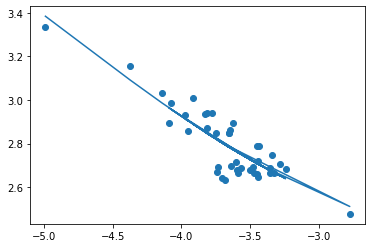

In [183]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [184]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.006279192699595593
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.04113693693693694, 'epsilon': 0.08217387387387387, 'C': 82.5925925925926}


In [185]:
regressor = SVR(kernel='rbf',epsilon=0.08217387387387387, gamma = 0.04113693693693694, C=82.5925925925926)
regressor.fit(x_train.reshape(-1, 1),y_train)

SVR(C=82.5925925925926, epsilon=0.08217387387387387, gamma=0.04113693693693694)

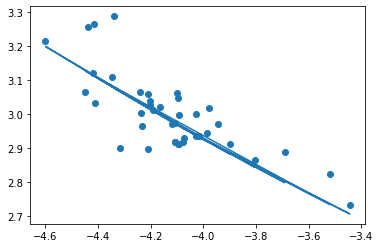

In [186]:
plt.scatter(x_stest,y_stest)
plt.plot(x_stest, model.predict(x_stest.reshape(-1,1)))

In [187]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test.reshape(-1,1)) - 10**y_test)**2))) # 1 is the best score

RMSE:  126.29321797480753


In [188]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2))) # 1 is the best score

RMSE:  205.76221965781912
